<h1 align="center" style="color: green;">Task 2 of the Virtual Internship!</h1>

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df_camp = pd.read_csv("datasets/dim_campaigns.csv")
df_prod = pd.read_csv("datasets/dim_products.csv")
df_stores = pd.read_csv("datasets/dim_stores.csv")
df_fevents = pd.read_csv("datasets/fact_events.csv")

### 1.Visualizing the number of stores per city

In [4]:
stores_per_city = df_stores.groupby('city')['store_id'].nunique()
# stores_per_city.columns

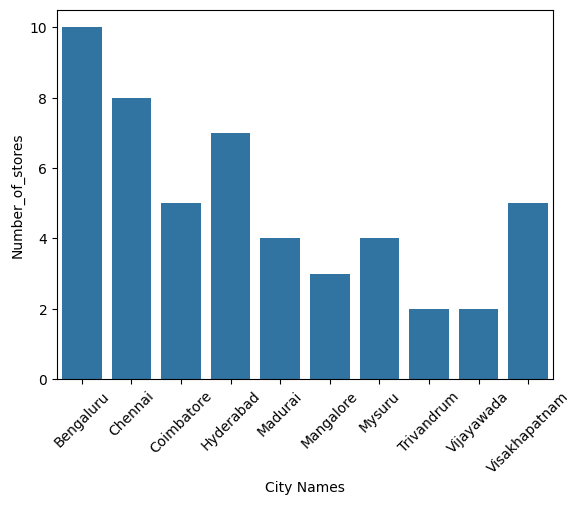

In [5]:
sns.barplot(stores_per_city)
plt.xticks(rotation=45)
plt.ylabel('Number_of_stores')
plt.xlabel('City Names')
plt.show()

### 2.visualizing the total quantity sold after the Sankranti campaign across different product categories.

In [6]:
sankrant_camp = df_fevents[df_fevents.campaign_id=='CAMP_SAN_01'].reset_index().copy()
sankrant_camp.head()

,index,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo)
0,1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622
1,4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272
2,7,6.88E+10,STVJD-0,CAMP_SAN_01,P08,1190,22.0,BOGOF,595,88
3,10,a7fecb,STBLR-1,CAMP_SAN_01,P03,200,361.0,BOGOF,100,963
4,11,d04bc1,STCBE-0,CAMP_SAN_01,P09,90,49.0,25% OFF,67,46


In [7]:
product_category_mapping = {
    "P01": "Grocery & Staples",
    "P02": "Grocery & Staples",
    "P03": "Grocery & Staples",
    "P04": "Grocery & Staples",
    "P05": "Home Care",
    "P06": "Home Care",
    "P07": "Home Care",
    "P08": "Home Care",
    "P09": "Personal Care",
    "P10": "Personal Care",
    "P11": "Personal Care",
    "P12": "Personal Care",
    "P13": "Home Appliances",
    "P14": "Home Appliances",
    "P15": "Combo1"
}

product_name_mapping = {
    "P01": "Atliq_Masoor_Dal (1KG)",
    "P02": "Atliq_Sonamasuri_Rice (10KG)",
    "P03": "Atliq_Suflower_Oil (1L)",
    "P04": "Atliq_Farm_Chakki_Atta (1KG)",
    "P05": "Atliq_Scrub_Sponge_For_Dishwash",
    "P06": "Atliq_Fusion_Container_Set_of_3",
    "P07": "Atliq_Curtains",
    "P08": "Atliq_Double_Bedsheet_set",
    "P09": "Atliq_Body_Milk_Nourishing_Lotion (120ML)",
    "P10": "Atliq_Cream_Beauty_Bathing_Soap (125GM)",
    "P11": "Atliq_Doodh_Kesar_Body_Lotion (200ML)",
    "P12": "Atliq_Lime_Cool_Bathing_Bar (125GM)",
    "P13": "Atliq_High_Glo_15W_LED_Bulb",
    "P14": "Atliq_waterproof_Immersion_Rod",
    "P15": "Atliq_Home_Essential_8_Product_Combo"
}

sankrant_camp['category'] = sankrant_camp['product_code'].map(product_category_mapping)
sankrant_camp['product_name'] = sankrant_camp['product_code'].map(product_name_mapping)

df_fevents['category'] = df_fevents['product_code'].map(product_category_mapping)
df_fevents['product_name'] = df_fevents['product_code'].map(product_name_mapping)

In [8]:
category_sales = sankrant_camp.groupby('category')['quantity_sold(after_promo)'].sum()
category_sales_percentage = (category_sales / category_sales.sum()) * 100


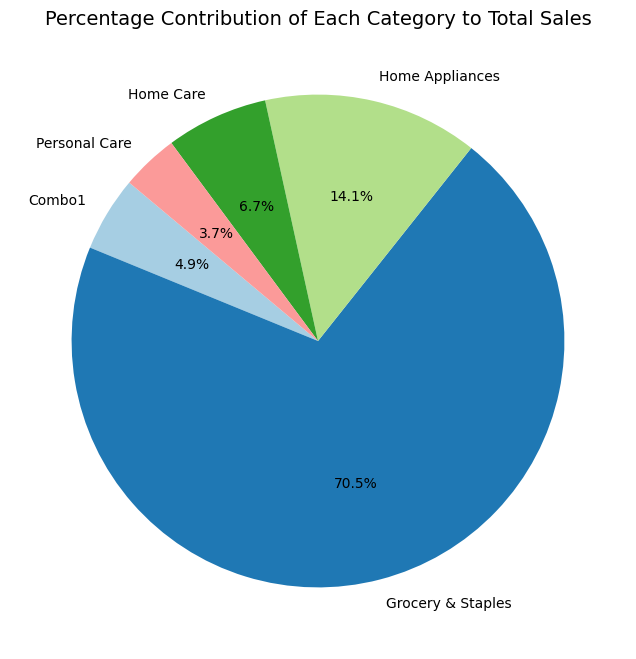

In [9]:
# Plotting the pie chart
plt.figure(figsize=(8, 8))
category_sales_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Percentage Contribution of Each Category to Total Sales', fontsize=14)
plt.ylabel('')  # Remove y-axis label for better visualization
plt.show()

The Major contribution is done by Grocery & staples category with the least contribution done by Combo1 category

### 3.the correlation between base price (after the promotion) and sales quantities (after the promotion)

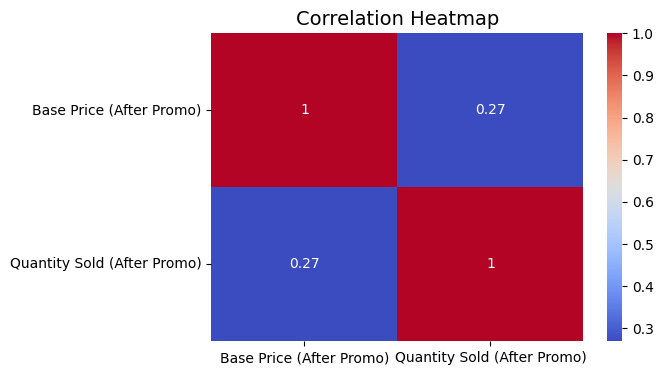

In [10]:
# Calculate the correlation coefficient
correlation_data = df_fevents[['base_price(after_promo)', 'quantity_sold(after_promo)']]
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    cbar=True, 
    xticklabels=['Base Price (After Promo)', 'Quantity Sold (After Promo)'], 
    yticklabels=['Base Price (After Promo)', 'Quantity Sold (After Promo)']
)
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

A correlation of 0.27 suggests that there is a slight tendency for sales quantities to increase as the base price increases, but the relationship is not strong.
This heatmap suggests that while price plays a role, it is not the dominant factor affecting sales quantities after the promotion.

### 4. Analyzing the distribution of quantity sold before the promotion for each product category

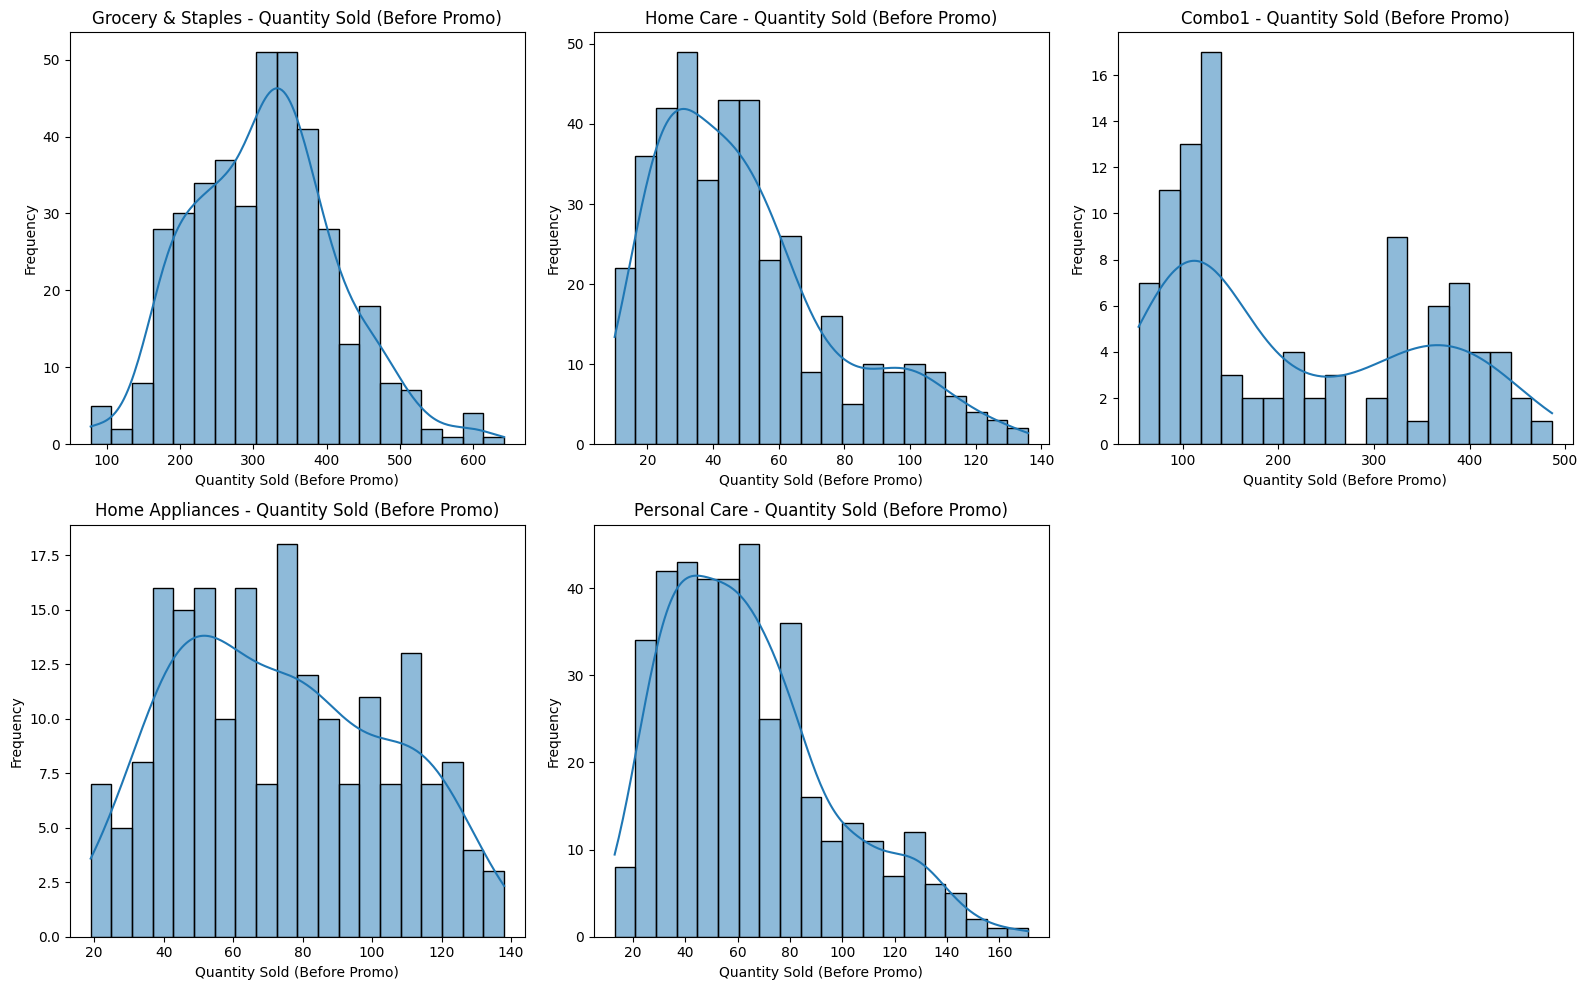

In [15]:
categories = df_fevents['category'].unique()

# Set number of columns for subplots
cols = 3
rows = (len(categories) // cols) + (len(categories) % cols > 0)

# Create the plot area
plt.figure(figsize=(16, 5 * rows))

# Plot individual histograms
for i, category in enumerate(categories, 1):
    plt.subplot(rows, cols, i)
    subset = df_fevents[df_fevents['category'] == category]
    sns.histplot(subset['quantity_sold(before_promo)'], bins=20, kde=True)
    plt.title(f'{category} - Quantity Sold (Before Promo)', fontsize=12)
    plt.xlabel('Quantity Sold (Before Promo)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## 📊 Insights: Quantity Sold (Before Promotion) by Product Category

This analysis looks at the distribution of units sold **before** the promotion, for each product category. The goal is to understand customer purchase behavior and inform future promotional strategies.

---

### 🛒 Grocery & Staples
- **Distribution**: Roughly **normal** (bell-shaped), centered around **350 units**.
- **Insight**: High and stable sales — this category is likely made up of essential, frequently purchased items.
- **Promo Strategy**: Use promotions to **increase volume further** or **cross-sell with other staples**.

---

### 🧴 Home Care
- **Distribution**: **Right-skewed** — most values are low, with a few high.
- **Insight**: Most products in this category sell in small quantities, but a few do well.
- **Promo Strategy**: Focus on **lifting underperforming SKUs** or running promotions for **less-known items**.

---

### 🍱 Combo1
- **Distribution**: **Multimodal** — multiple peaks suggest different sales patterns across combo products.
- **Insight**: Likely multiple types of combos with different popularity levels.
- **Promo Strategy**: Further **segment combo types** and apply **targeted promotions** for each group.

---

### 🛋️ Home Appliances
- **Distribution**: Slightly **right-skewed**, fairly uniform spread.
- **Insight**: Modest sales without strong extremes — probably higher-cost, lower-frequency purchases.
- **Promo Strategy**: Consider **discounts, bundle offers**, or **EMI options** to stimulate demand.

---

### 🧼 Personal Care
- **Distribution**: Clearly **right-skewed**, most items have low to moderate sales.
- **Insight**: Likely many SKUs splitting the demand.
- **Promo Strategy**: Use promotions to **boost brand awareness** or push **new product launches**.

### 5. Analyzing the incremental sold units percentage (ISU%) across various cities.

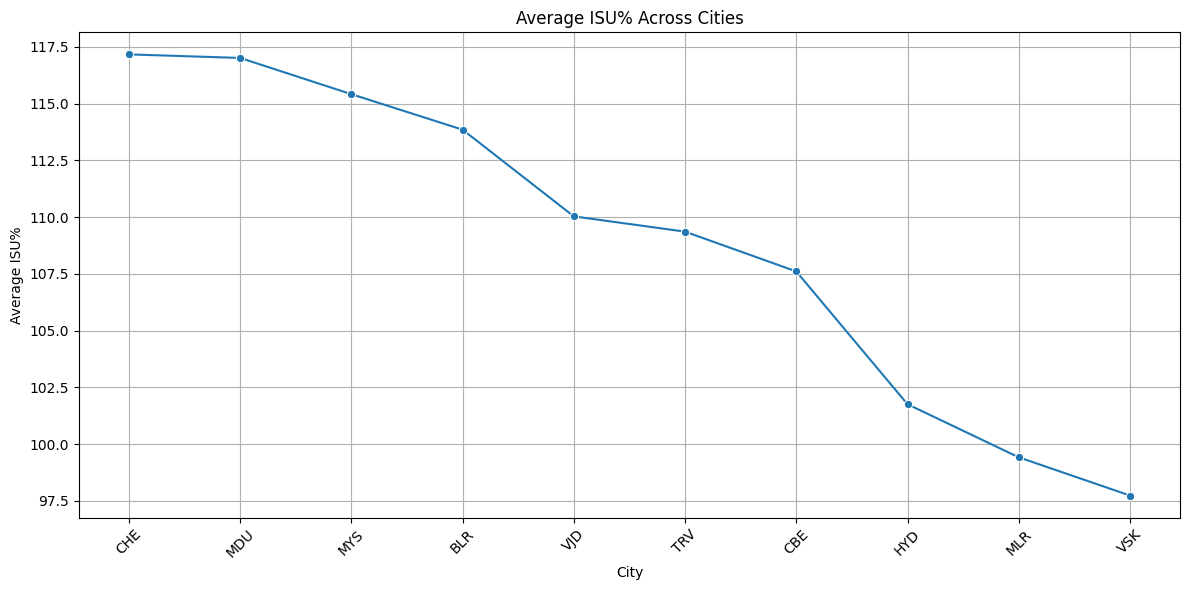

(city           CHE
 ISU%    117.164014
 Name: 2, dtype: object,
 city         VSK
 ISU%    97.74108
 Name: 9, dtype: object)

In [19]:
# Step 1: Extract city code from 'store_id'
df_fevents['city'] = df_fevents['store_id'].str.extract(r'ST([A-Z]+)')

# Step 2: Calculate ISU%
df_fevents['ISU%'] = ((df_fevents['quantity_sold(after_promo)'] - df_fevents['quantity_sold(before_promo)']) /
              df_fevents['quantity_sold(before_promo)']) * 100

# Step 3: Group by city and calculate average ISU%
city_isu = df_fevents.groupby('city')['ISU%'].mean().reset_index().sort_values(by='ISU%', ascending=False)

# Step 4: Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=city_isu, x='city', y='ISU%', marker='o')
plt.title('Average ISU% Across Cities')
plt.xlabel('City')
plt.ylabel('Average ISU%')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 5: Find highest and lowest ISU% cities
highest_isu = city_isu.iloc[0]
lowest_isu = city_isu.iloc[-1]

highest_isu, lowest_isu


## 📊 Insights: Average ISU% Across Cities 
- ***Chennai*** shows the **highest** ISU% among the other cities
- ***Visakhapatnam*** is the city which has the **lowest** ISU% among all 

### 6. Analyzing the relationship between incremental revenue and  incremental sold units for different promotion types in Hyderabad

In [43]:
df_hyd = df_fevents[df_fevents['city']=='HYD'].copy()
revenue_before_promo = df_hyd['quantity_sold(before_promo)']*df_hyd['base_price(before_promo)']
revenue_after_promo = df_hyd['base_price(after_promo)']*df_hyd['quantity_sold(after_promo)']

In [44]:
df_hyd["revenue_before"] = revenue_before_promo
df_hyd["revenue_after"] = revenue_after_promo

In [48]:
grouped = df_hyd.groupby('promo_type')[['revenue_before', 'revenue_after', 'quantity_sold(before_promo)', 'quantity_sold(after_promo)']].sum().reset_index()

In [49]:
grouped['IR%'] = ((grouped['revenue_after'] - grouped['revenue_before']) / grouped['revenue_before']) * 100

In [50]:
grouped['ISU%'] = (
    (grouped['quantity_sold(after_promo)'] - grouped['quantity_sold(before_promo)']) /
    grouped['quantity_sold(before_promo)']
) * 100

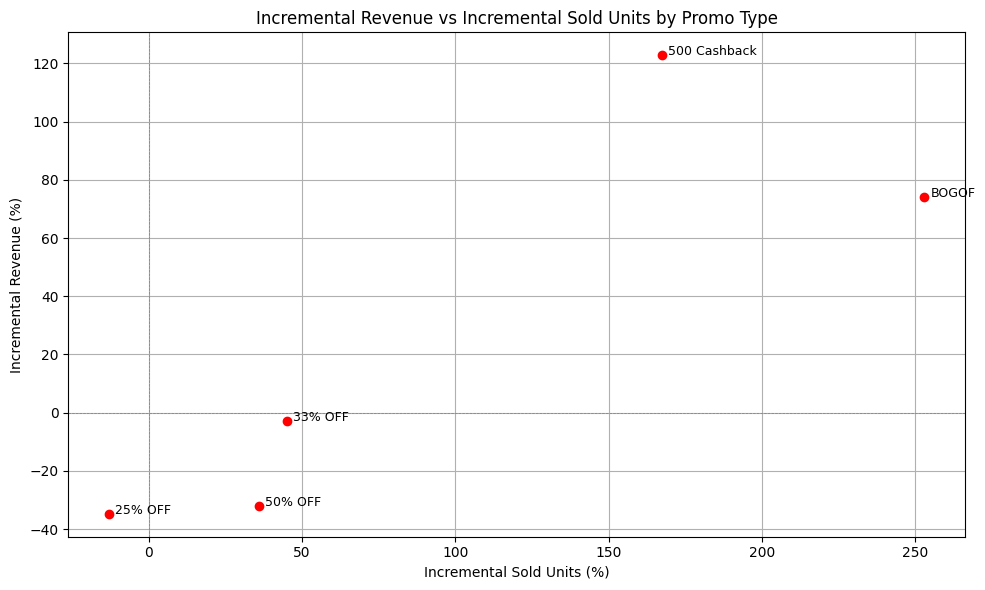

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(grouped["ISU%"], grouped["IR%"], color='red')

# Add labels for each point
for i in range(len(grouped)):
    plt.text(grouped["ISU%"][i] + 2, grouped["IR%"][i], grouped["promo_type"][i], fontsize=9)

plt.title("Incremental Revenue vs Incremental Sold Units by Promo Type")
plt.xlabel("Incremental Sold Units (%)")
plt.ylabel("Incremental Revenue (%)")
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# 📊 Promo Type Performance Analysis

The plot below visualizes the effectiveness of different promotional types based on two metrics:
- **Incremental Sold Units**
- **Incremental Revenue (%)**

## 🔍 Key Observations:

- **₹500 Cashback**
  - 🔼 **Highest revenue impact**: Over **120% incremental revenue**.
  - 🔼 **Strong unit uplift**: Around **160 incremental units sold**.
  - ✅ Highly effective in driving both sales and revenue.

- **BOGOF (Buy One Get One Free)**
  - 🔼 **High increase in units sold**: Around **250 units**.
  - 🔼 **Moderate revenue growth**: Around **60%**.
  - ✅ Great for clearing inventory and boosting volume, though may reduce per-unit revenue.

- **33% OFF**
  - 🟰 **Neutral revenue impact**: Close to **0% incremental revenue**.
  - 🔼 Moderate unit sales increase: Around **45 units**.
  - ⚖️ Balanced impact, likely maintaining revenue while moving some stock.

- **50% OFF**
  - 🔽 **Negative revenue impact**: Around **-30%**.
  - 🔼 Some increase in units sold.
  - ❌ Deep discounts likely eroded profit margins despite sales boost.

- **25% OFF**
  - 🔽 **Negative revenue impact**: Around **-35%**.
  - 🔽 Little to no increase in units sold.
  - ❌ Ineffective — may not have offered enough perceived value to customers.

## 💡 Insights:
- Cashback offers and BOGOF promotions performed the best in both sales and revenue uplift.
- Flat discounts (especially deeper ones) may hurt revenue if not paired with sufficient sales volume increases.
- A thoughtful promotional strategy is key — higher discount doesn’t always mean better performance.


### 7. Analyzing the revenue before and after promotions across different product categories in Bengaluru.

In [46]:
df_blr = df_fevents[df_fevents['city']=='BLR'].copy()

In [ ]:
revenue_before_promo_blr = df_blr['quantity_sold(before_promo)']*df_blr['base_price(before_promo)']
revenue_after_promo_blr = df_blr['base_price(after_promo)']*df_blr['quantity_sold(after_promo)']

In [ ]:
df_blr["revenue_before"] = revenue_before_promo_blr
df_blr["revenue_after"] = revenue_after_promo_blr

In [55]:
grouped_blr = df_blr.groupby('category')[['revenue_before', 'revenue_after']].sum().reset_index()

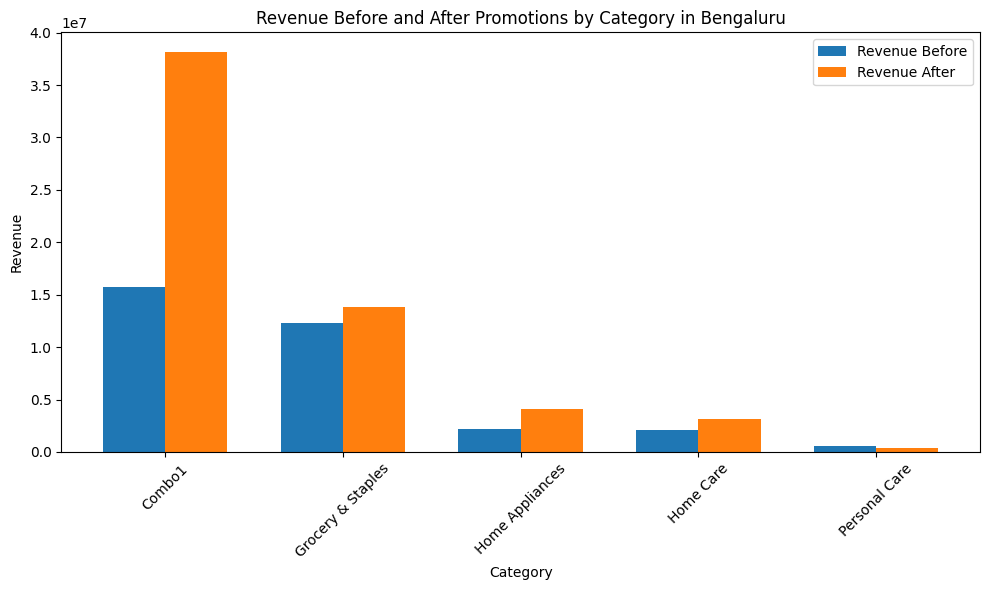

In [62]:
df = grouped_blr

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(df))

bar1 = ax.bar(index, df["revenue_before"], bar_width, label='Revenue Before')
bar2 = ax.bar([i + bar_width for i in index], df["revenue_after"], bar_width, label='Revenue After')

ax.set_xlabel('Category')
ax.set_ylabel('Revenue')
ax.set_title('Revenue Before and After Promotions by Category in Bengaluru')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(df["category"], rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


# 🔍 Category-wise Analysis

## 📦 Combo1
- **Massive increase in revenue**: from ₹1.58 crore to ₹3.81 crore.
- Promotions were extremely successful here — possibly due to bundled value or heavy discounts.

## 🛒 Grocery & Staples
- **Moderate increase in revenue**: from ₹1.23 crore to ₹1.39 crore.
- Being essentials, sales may not have needed much promotional push but still benefited slightly.

## 🔌 Home Appliances
- **Significant growth**: from ₹21.9 lakh to ₹41.2 lakh.
- Promotions likely drove larger, planned purchases.

## 🧼 Home Care
- **Steady improvement**: from ₹21.0 lakh to ₹31.8 lakh.
- Useful everyday products, benefitting from discounts or combo deals.

## 🧴 Personal Care
- **Slight decline**: from ₹5.76 lakh to ₹3.90 lakh.
- This category did not benefit from promotions — possibly due to ineffective targeting or strong brand preferences unaffected by price cuts.
